In [1]:
#Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

#Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [31]:
job_title = 'Data Analyst'
num_of = 10
job_place = 'United Kingdom'
df_da_uk = df[(df['job_title_short'] == job_title) & (df['job_country'] == job_place)].copy()

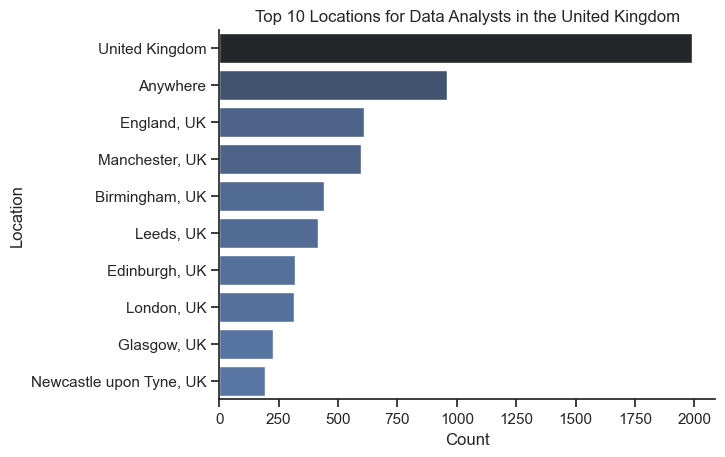

In [37]:
df_plot = df_da_uk['job_location'].value_counts().head(num_of).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title(f'Top {num_of} Locations for {job_title}s in the {job_place}')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

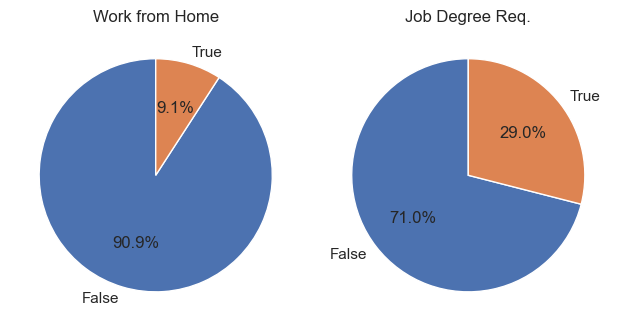

In [33]:
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.'
}
fig, ax = plt.subplots(ncols=len(dict_column))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_da_uk[column].value_counts(), startangle= 90, autopct= '%1.1f%%', labels=['False','True'])
    ax[i].set_title(title)

fig.tight_layout()
plt.show()

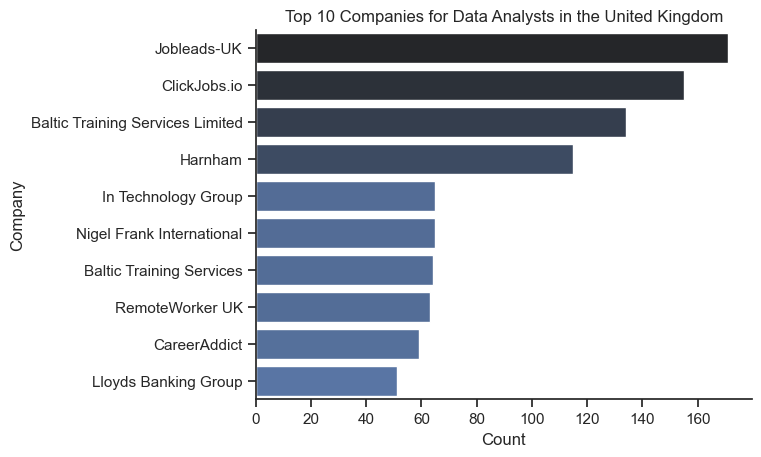

In [36]:
df_plot = df_da_uk['company_name'].value_counts().head(num_of).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title(f'Top {num_of} Companies for {job_title}s in the {job_place}')
plt.xlabel('Count')
plt.ylabel('Company')
plt.show()

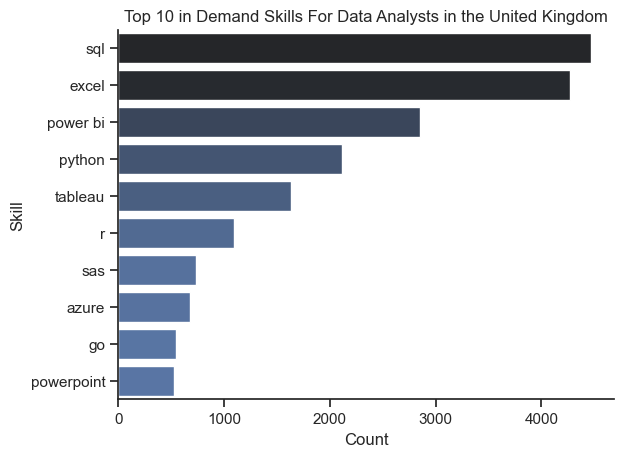

In [39]:
df_plot_ex = df_da_uk.explode('job_skills').copy()
df_plot_ex = df_plot_ex['job_skills'].value_counts().head(num_of).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot_ex, x='count', y='job_skills', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title(f'Top {num_of} in Demand Skills For {job_title}s in the {job_place}')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.show()